## Import the library

In [228]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Reading the data

In [229]:
df=pd.read_csv('data.csv')
df.head()


,age,sex,cp,trestbps,restecg,exang,oldpeak,output
0,28,1,2,130,2,0,0.0,2
1,29,1,2,120,0,0,0.0,2
2,29,1,2,140,0,0,0.0,2
3,30,0,1,170,1,0,0.0,0
4,31,0,2,100,1,0,0.0,2


In [230]:
data1=df[['age','trestbps']]

data1.head()

,age,trestbps
0,28,130
1,29,120
2,29,140
3,30,170
4,31,100


In [231]:
data1.shape


(294, 2)

In [232]:
data2=df[['output']] 
data2.head()

,output
0,2
1,2
2,2
3,0
4,2


In [233]:
y = data2.iloc[:,0].values
print(y)

[2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 0 2 1 0 1 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 2 2 2 0 1 0 1 1 1 0 1 0 0 1]


In [234]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 2 columns):
age         294 non-null int64
trestbps    294 non-null int64
dtypes: int64(2)
memory usage: 4.7 KB


In [235]:
data1.describe()

,age,trestbps
count,294.000000,294.000000
mean,47.826531,132.540816
std,7.811812,17.611760
min,28.000000,92.000000
25%,42.000000,120.000000
50%,49.000000,130.000000
75%,54.000000,140.000000
max,66.000000,200.000000


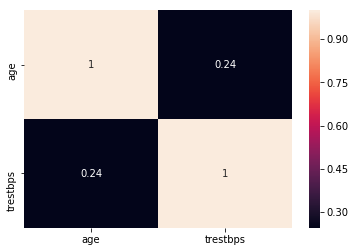

In [236]:
correlation_matrix=data1.corr()
sns.heatmap(correlation_matrix,annot=True)

## Conclusion of heatmap
<b> Highly positive correlation </b>
- child_mort and total_fer
- import and export
- gdpp and income

<b>Highly negative correlation </b>
- life_expec and total_fer

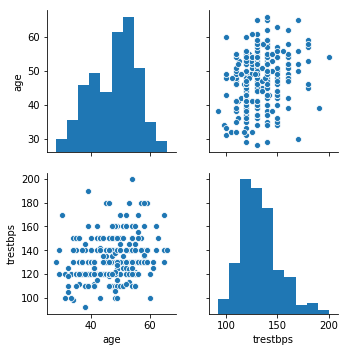

In [237]:
sns.pairplot(data1)

## Scaling data using StandardScaler
- StandardScaler transform the data such that the mean is 0 and variance is 1 
- model perform well if we scale our data

In [238]:
from sklearn.preprocessing import StandardScaler

In [239]:
scaling=StandardScaler()
scaled_data=scaling.fit_transform(data1)

C:\Users\limon28\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\limon28\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [240]:
scaled_df=pd.DataFrame(scaled_data,columns=data1.columns)
scaled_df.head()

,age,trestbps
0,-2.542347,-0.144514
1,-2.414117,-0.713285
2,-2.414117,0.424256
3,-2.285888,2.130568
4,-2.157658,-1.850826


## K-Means cluster: 3

In [241]:
from sklearn.cluster import KMeans

In [242]:
kmeans= KMeans(n_clusters=3,random_state=42)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [243]:
kmeans.labels_

array([2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 2,
       0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1])

## Predict the values

In [244]:
predicted_labels=kmeans.fit_predict(scaled_df)
predicted_labels

array([2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 2,
       0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1])

In [245]:
kmeans_df=pd.DataFrame(df)
kmeans_df['KMeans_cluster']=predicted_labels
kmeans_df.head()

,age,sex,cp,trestbps,restecg,exang,oldpeak,output,KMeans_cluster
0,28,1,2,130,2,0,0.0,2,2
1,29,1,2,120,0,0,0.0,2,2
2,29,1,2,140,0,0,0.0,2,2
3,30,0,1,170,1,0,0.0,0,0
4,31,0,2,100,1,0,0.0,2,2


## Evaluate the model 
- silhouette score
- Adjusted rand score
- Normalized nutual info score

In [246]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score

In [247]:
data2.head()

,output
0,2
1,2
2,2
3,0
4,2


In [248]:
predicted_labels

array([2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 2,
       0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1])

In [249]:
kmeans.labels_

array([2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 2,
       0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1])

In [250]:
score_silhouette=silhouette_score(scaled_df,kmeans.labels_)
score_ami=adjusted_rand_score(y,predicted_labels)
score_nmi=normalized_mutual_info_score(y,predicted_labels)

print('Silhouette score: ',score_silhouette)
print('AMI score: ',score_ami)
print('NMI score: ',score_nmi)

Silhouette score:  0.38930258460323003
AMI score:  0.25377712439027394
NMI score:  0.2406307844832962


C:\Users\limon28\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


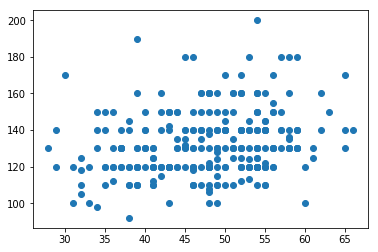

In [251]:
x=data1['age']
y=data1['trestbps']
plt.scatter(x,y)

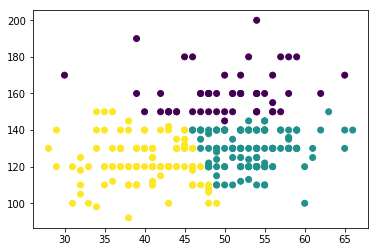

In [252]:
x=data1['age']
y=data1['trestbps']
plt.scatter(x,y,c=kmeans.labels_)